**TUGAS BESAR dengn MACHINE LEARNING **
Topik : ANALISIS PREDIKSI BERBASIS DATA - OCCUPATION AND OUTCOME

---

Nama : Nur Hamidaturrohmah Asy Syafii
NIM  : 202022420004

---

1. Latar Belakang Masalah

Dalam era *data-driven decision making*, pemanfaatan data demografis untuk memprediksi hasil (outcome) strategis telah menjadi fokus utama dalam berbagai literatur sistem cerdas. Salah satu atribut yang memiliki signifikansi tinggi dalam penentuan profil risiko atau keberhasilan individu adalah jenis pekerjaan (occupation). Informasi ini tidak hanya mencerminkan status ekonomi, tetapi juga pola perilaku yang relevan untuk klasifikasi prediktif.

Namun, tantangan utama dalam pemodelan data sosial-ekonomi seperti dataset *Occupation and Outcome* adalah kompleksitas pola dan ketidakseimbangan kelas (imbalanced dataset). Penelitian terdahulu (misalnya oleh Chawla et al., 2002) menegaskan bahwa ketidakseimbangan data dapat menyebabkan model menjadi bias pada kelas mayoritas, sehingga akurasi prediksi pada kelas minoritas menjadi rendah. Oleh karena itu, penerapan metode pra-pemrosesan data seperti *Synthetic Minority Over-sampling Technique* (SMOTE) dan seleksi fitur menjadi krusial sebelum dilakukan pemodelan.

Untuk mengatasi permasalahan klasifikasi pada data dengan variasi kategorikal yang tinggi, algoritma berbasis *ensemble learning* seperti *Random Forest* sering menjadi rujukan utama. Sebagaimana dijelaskan oleh Breiman (2001), *Random Forest* memiliki kemampuan generalisasi yang baik dan tahan terhadap *overfitting* dibandingkan *model decision tree* tunggal.

Berdasarkan urgensi tersebut, tugas besar ini bertujuan mengimplementasikan alur kerja *Machine Learning* yang komprehensif. Dimulai dari eksplorasi data, penanganan ketidakseimbangan data, hingga optimasi model melalui *hyperparameter tuning* guna menghasilkan sistem prediksi yang objektif dan akurat sesuai kaidah ilmiah.




In [ ]:
# --- BAGIAN 2: Data Loading & Cleaning  ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data dari GitHub
url_dataset = 'https://raw.githubusercontent.com/midaasyafii-sys/Tubes-Fintech-Occupation-Outcomes/refs/heads/main/Occupations.csv'

try:
    df = pd.read_csv(url_dataset)
    print("✅ Berhasil membaca data dari GitHub!")
except Exception as e:
    print("❌ Gagal membaca data. Pastikan link yang dimasukkan adalah Link RAW.")
    print(f"Error: {e}")

print("\n=== Info Awal (Sebelum Cleaning) ===")
# Cek apakah df berhasil dibuat sebelum lanjut
if 'df' in locals():
    print(f"Total Baris: {len(df)}")
    print(df.isnull().sum())

    # 2. DATA CLEANING (untuk melihat data Nan atau mismatch)
    # A. Hapus baris jika Target (Income) kosong
    df_clean = df.dropna(subset=['Income'])

    # B. Isi Missing Values (Imputasi)
    # - Kolom Angka (misal Age) diisi Median
    for col in df_clean.select_dtypes(include='number').columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    # - Kolom Teks (misal Occupation) diisi Modus (yang paling sering muncul)
    for col in df_clean.select_dtypes(include='object').columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    # C. Hapus duplikat
    df_clean = df_clean.drop_duplicates()

    print(f"\n=== Info Akhir (Setelah Cleaning) ===")
    print(f"Sisa Baris: {len(df_clean)}")
    print("Jumlah Missing Values:", df_clean.isnull().sum().sum())
else:
    print("Dataframe belum terbentuk. Perbaiki link URL.")

✅ Berhasil membaca data dari GitHub!

=== Info Awal (Sebelum Cleaning) ===
Total Baris: 250000
Age               66210
Workclass         45306
FinalWeight       85383
Education         82834
EducationYears    53169
MaritalStatus     49357
Occupation        33338
Relationship      55738
Race              65598
Gender            44543
CapitalGain       56459
CapitalLoss       84895
HoursPerWeek      96118
NativeCountry     98861
Income            91153
dtype: int64


/tmp/ipython-input-1993620276.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(df_clean[col].median())
/tmp/ipython-input-1993620276.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])



=== Info Akhir (Setelah Cleaning) ===
Sisa Baris: 131607
Jumlah Missing Values: 0


In [ ]:
# ==========================================
# BAGIAN 2: Data Loading & Initial Exploration (Before vs After)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATASET (BACA DATA)
url_dataset = 'https://raw.githubusercontent.com/midaasyafii-sys/Tubes-Fintech-Occupation-Outcomes/refs/heads/main/Occupations.csv'
df = pd.read_csv(url_dataset)

# ---------------------------------------------------------
# TAHAP A: ANALISA KONDISI AWAL (BEFORE CLEANING)
# Cek datasetnya sebelum dibersihkan
# ---------------------------------------------------------
print("\n" + "="*40)
print("   ANALISA DATA MENTAH (BEFORE CLEANING)")
print("="*40)

# Cek Dimensi Data
print(f"1. Total Baris Data Asli: {len(df)} baris")
print(f"2. Total Kolom: {len(df.columns)} kolom")

# Cek Missing Values (NaN)
print("\n3. Pengecekan Missing Values (Data Kosong):")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0]) # Hanya tampilkan yang ada errornya

# Cek Duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"\n4. Jumlah Data Duplikat: {jumlah_duplikat} baris")

# Cek Target (Income) yang kosong
target_null = df['Income'].isnull().sum()
print(f"5. Target (Income) yang kosong: {target_null} baris")
print("\n[KESIMPULAN AWAL]: Data ini kotor. Banyak missing values dan duplikat yang harus dibersihkan.")


# ---------------------------------------------------------
# TAHAP B: PROSES CLEANING
# Melakukan pembersihan setelah proses checking
# ---------------------------------------------------------
print("\n" + "="*40)
print("          PROSES DATA CLEANING...")
print("="*40)

df_clean = df.copy()

# 1. Hapus Baris jika Target 'Income' Kosong
# (Kita tidak bisa memprediksi data yang targetnya saja tidak ada)
df_clean = df_clean.dropna(subset=['Income'])
print("-> Menghapus baris dengan Income kosong... Selesai.")

# 2. Hapus Data Duplikat
df_clean = df_clean.drop_duplicates()
print("-> Menghapus data duplikat... Selesai.")

# 3. Imputasi (Mengisi Data Kosong)
# - Kolom Angka (misal Age) diisi dengan MEDIAN (nilai tengah)
numerical_cols = df_clean.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# - Kolom Teks (misal Occupation) diisi dengan MODUS (nilai terbanyak)
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("-> Mengisi data kosong (Imputasi)... Selesai.")


# ---------------------------------------------------------
# TAHAP C: ANALISA HASIL AKHIR (AFTER CLEANING)
# Proofing datanya sudah bersih
# ---------------------------------------------------------
print("\n" + "="*40)
print("   ANALISA DATA BERSIH (AFTER CLEANING)")
print("="*40)

print(f"1. Total Baris Sekarang: {len(df_clean)} baris")
print(f"   (Berkurang {len(df) - len(df_clean)} baris sampah)")

# Cek Ulang Missing Values
sisa_missing = df_clean.isnull().sum().sum()
print(f"2. Sisa Missing Values: {sisa_missing}")

# Cek Ulang Duplikat
sisa_duplikat = df_clean.duplicated().sum()
print(f"3. Sisa Duplikat: {sisa_duplikat}")

print("\n[STATUS]: DATASET SIAP DIGUNAKAN UNTUK TAHAP SELANJUTNYA (BAGIAN 3).")


   ANALISA DATA MENTAH (BEFORE CLEANING)
1. Total Baris Data Asli: 250000 baris
2. Total Kolom: 15 kolom

3. Pengecekan Missing Values (Data Kosong):
Age               66210
Workclass         45306
FinalWeight       85383
Education         82834
EducationYears    53169
MaritalStatus     49357
Occupation        33338
Relationship      55738
Race              65598
Gender            44543
CapitalGain       56459
CapitalLoss       84895
HoursPerWeek      96118
NativeCountry     98861
Income            91153
dtype: int64

4. Jumlah Data Duplikat: 1309 baris
5. Target (Income) yang kosong: 91153 baris

[KESIMPULAN AWAL]: Data ini kotor. Banyak missing values dan duplikat yang harus dibersihkan.

          PROSES DATA CLEANING...
-> Menghapus baris dengan Income kosong... Selesai.
-> Menghapus data duplikat... Selesai.
-> Mengisi data kosong (Imputasi)... Selesai.

   ANALISA DATA BERSIH (AFTER CLEANING)
1. Total Baris Sekarang: 157905 baris
   (Berkurang 92095 baris sampah)
2. Sisa Missing

=== 3. RINGKASAN STATISTIK & EKSPLORASI DATA (EDA) ===

[A. Profil Demografis Responden]
Tabel berikut menampilkan distribusi statistik untuk fitur numerik (setelah imputasi Median):


,Age,FinalWeight,EducationYears,CapitalGain,CapitalLoss,HoursPerWeek
count,157905.000000,1.579050e+05,157905.000000,157905.000000,157905.000000,157905.000000
mean,38.181521,1.861781e+05,10.066008,838.926931,57.031627,40.256154
std,11.760720,8.582583e+04,2.285239,6496.425929,327.439819,9.697442
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.534890e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786150e+05,10.000000,0.000000,0.000000,40.000000
75%,44.000000,2.005760e+05,11.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



[B. Profil Pekerjaan & Target]
Tabel berikut menampilkan frekuensi kategori terbanyak (Top) untuk setiap fitur teks:


,Workclass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,NativeCountry,Income
count,157905,157905,157905,157905,157905,157905,157905,157905,157905
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,119015,86256,89501,38640,84920,140708,114767,147981,119844


/tmp/ipython-input-4060037269.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=df_clean,


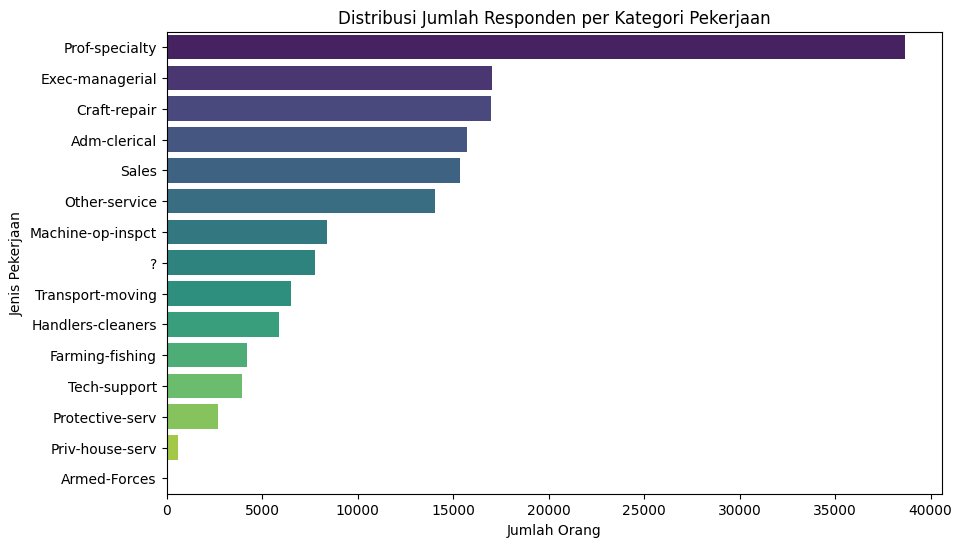

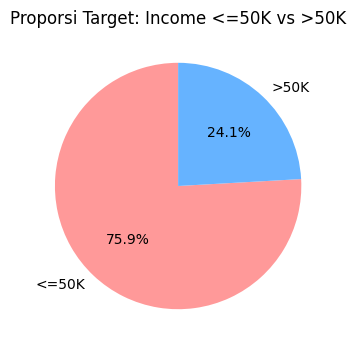


   KESIMPULAN EKSPLORASI (INSIGHT)
1. Profil Usia: Rata-rata responden berusia 38.2 tahun, yang merupakan usia produktif.
2. Etos Kerja: Rata-rata jam kerja adalah 40.3 jam/minggu.
3. Dominasi Sektor: Pekerjaan yang paling banyak muncul dalam dataset adalah 'Prof-specialty'.
4. Isu Imbalance: Mayoritas responden memiliki income '<=50K'.
   Kelas minoritas hanya mencakup 24.1% dari total data.
   [ACTION]: Hal ini mengonfirmasi perlunya teknik SMOTE di tahap selanjutnya (Bagian 4).


In [ ]:
# ==========================================
# BAGIAN 3: Statistical Summary of the Dataset
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns

print("=== 3. RINGKASAN STATISTIK & EKSPLORASI DATA (EDA) ===\n")

# A. STATISTIK NUMERIK (Angka)
# Kita ingin melihat profil demografis responden (Usia, Jam Kerja, Pendidikan)
print("[A. Profil Demografis Responden]")
print("Tabel berikut menampilkan distribusi statistik untuk fitur numerik (setelah imputasi Median):")
display(df_clean.describe())

# B. STATISTIK KATEGORIKAL (Teks)
# Kita ingin melihat dominasi Pekerjaan dan distribusi Target Income
print("\n[B. Profil Pekerjaan & Target]")
print("Tabel berikut menampilkan frekuensi kategori terbanyak (Top) untuk setiap fitur teks:")
display(df_clean.describe(include='O'))

# C. VISUALISASI FOKUS (Occupation & Outcome)
# Visualisasi ini penting untuk membuktikan hipotesis awal tentang hubungan Pekerjaan dan Pendapatan

# 1. Grafik Distribusi Pekerjaan
plt.figure(figsize=(10, 6))
sns.countplot(y='Occupation', data=df_clean,
              order=df_clean['Occupation'].value_counts().index,
              palette='viridis')
plt.title('Distribusi Jumlah Responden per Kategori Pekerjaan')
plt.xlabel('Jumlah Orang')
plt.ylabel('Jenis Pekerjaan')
plt.show()

# 2. Grafik Keseimbangan Target (Income)
plt.figure(figsize=(6, 4))
colors = ['#ff9999','#66b3ff'] # Warna merah (Low) biru (High)
income_counts = df_clean['Income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporsi Target: Income <=50K vs >50K')
plt.show()

# D. KESIMPULAN OTOMATIS (Insight Generator)
# Bagian ini akan mencetak kesimpulan berdasarkan angka real di data
rata_usia = df_clean['Age'].mean()
rata_jam_kerja = df_clean['HoursPerWeek'].mean()
top_job = df_clean['Occupation'].mode()[0]
majority_income = df_clean['Income'].mode()[0]
minority_percentage = (df_clean['Income'].value_counts(normalize=True).min()) * 100

print("\n" + "="*40)
print("   KESIMPULAN EKSPLORASI (INSIGHT)")
print("="*40)
print(f"1. Profil Usia: Rata-rata responden berusia {rata_usia:.1f} tahun, yang merupakan usia produktif.")
print(f"2. Etos Kerja: Rata-rata jam kerja adalah {rata_jam_kerja:.1f} jam/minggu.")
print(f"3. Dominasi Sektor: Pekerjaan yang paling banyak muncul dalam dataset adalah '{top_job}'.")
print(f"4. Isu Imbalance: Mayoritas responden memiliki income '{majority_income}'.")
print(f"   Kelas minoritas hanya mencakup {minority_percentage:.1f}% dari total data.")
print("   [ACTION]: Hal ini mengonfirmasi perlunya teknik SMOTE di tahap selanjutnya (Bagian 4).")

In [ ]:
# ==========================================
# BAGIAN 4: Dataset Preparation (Encoding, Splitting, SMOTE)
# ==========================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

print("=== 4. DATASET PREPARATION ===\n")

# -------------------------------------------------------
# TAHAP A: ENCODING (TRANSFORMASI DATA KATEGORIKAL)
# Algoritma ML & SMOTE hanya menerima input angka, bukan teks.
# Kita ubah kolom teks (Occupation, dll) menjadi angka.
# -------------------------------------------------------
print("[A. Encoding Variabel Kategorikal]")
df_model = df_clean.copy()
le = LabelEncoder()

# Kita simpan mapping khusus untuk Target (Income) agar tidak bingung nanti
# Income: <=50K jadi 0, >50K jadi 1
df_model['Income'] = le.fit_transform(df_model['Income'])
income_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(f"   Mapping Target Income: {income_mapping}")

# Encode fitur lainnya
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])
print("   Status: Seluruh data teks telah diubah menjadi numerik.")

# Pisahkan Fitur (X) dan Target (y)
X = df_model.drop('Income', axis=1)
y = df_model['Income']


# -------------------------------------------------------
# TAHAP B: SPLITTING DATA (70:30)
# Kita membagi data menjadi Training (untuk melatih model)
# dan Testing (untuk menguji performa model nanti).
# -------------------------------------------------------
print("\n[B. Splitting Data (70:30)]")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"   Jumlah Data Training (X_train): {len(X_train)} baris")
print(f"   Jumlah Data Testing  (X_test) : {len(X_test)} baris")


# -------------------------------------------------------
# TAHAP C: PENANGANAN IMBALANCE (SMOTE)
# Kita terapkan SMOTE hanya pada Training Data agar model belajar seimbang.
# Data Testing DIBIARKAN APA ADANYA (Imbalance) untuk simulasi dunia nyata.
# -------------------------------------------------------
print("\n[C. Penanganan Ketidakseimbangan Data (SMOTE)]")

# 1. Cek Keseimbangan SEBELUM SMOTE
print("   1. Distribusi Training SEBELUM SMOTE:")
print(y_train.value_counts())

# 2. Proses SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Cek Keseimbangan SETELAH SMOTE
print("\n   2. Distribusi Training SETELAH SMOTE:")
print(y_train_smote.value_counts())

print("\n[KESIMPULAN TAHAP 4]:")
print(f"-> Jumlah data training meningkat dari {len(y_train)} menjadi {len(y_train_smote)} baris.")
print("-> Kelas minoritas (Income Tinggi) telah disetarakan jumlahnya.")
print("-> Data siap masuk ke tahap Modeling (Bagian 5).")

=== 4. DATASET PREPARATION ===

[A. Encoding Variabel Kategorikal]
   Mapping Target Income: {'<=50K': 0, '>50K': 1}
   Status: Seluruh data teks telah diubah menjadi numerik.

[B. Splitting Data (70:30)]
   Jumlah Data Training (X_train): 110533 baris
   Jumlah Data Testing  (X_test) : 47372 baris

[C. Penanganan Ketidakseimbangan Data (SMOTE)]
   1. Distribusi Training SEBELUM SMOTE:
Income
0    83961
1    26572
Name: count, dtype: int64

   2. Distribusi Training SETELAH SMOTE:
Income
0    83961
1    83961
Name: count, dtype: int64

[KESIMPULAN TAHAP 4]:
-> Jumlah data training meningkat dari 110533 menjadi 167922 baris.
-> Kelas minoritas (Income Tinggi) telah disetarakan jumlahnya.
-> Data siap masuk ke tahap Modeling (Bagian 5).


In [ ]:
# ==========================================
# BAGIAN 5: Modeling & Evaluation
# ==========================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("=== 5. MODELING & EVALUATION ===\n")

# -------------------------------------------------------
# SKENARIO 1: DECISION TREE CLASSIFIER
# Alasan: Model Baseline yang transparan (White-box).
# -------------------------------------------------------
print("[Model 1: Decision Tree]")
# 1. Inisialisasi Model
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Training (Latihan) dengan data SMOTE
print("   -> Sedang melatih model Decision Tree...")
dt_model.fit(X_train_smote, y_train_smote)

# 3. Testing (Ujian) dengan data Original (X_test)
y_pred_dt = dt_model.predict(X_test)

# 4. Evaluasi
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"   -> Akurasi: {acc_dt*100:.2f}%")
print("   -> Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_dt))
print("   -> Confusion Matrix (Benar vs Salah):")
print(confusion_matrix(y_test, y_pred_dt))


print("\n" + "-"*40 + "\n")


# -------------------------------------------------------
# SKENARIO 2: RANDOM FOREST CLASSIFIER
# Alasan: Model Ensemble yang lebih robust (Black-box).
# -------------------------------------------------------
print("[Model 2: Random Forest]")
# 1. Inisialisasi Model (100 Pohon)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Training
print("   -> Sedang melatih model Random Forest...")
rf_model.fit(X_train_smote, y_train_smote)

# 3. Testing
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluasi
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"   -> Akurasi: {acc_rf*100:.2f}%")
print("   -> Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))
print("   -> Confusion Matrix (Benar vs Salah):")
print(confusion_matrix(y_test, y_pred_rf))


# -------------------------------------------------------
# PERBANDINGAN & KESIMPULAN OTOMATIS
# -------------------------------------------------------
print("\n" + "="*40)
print("   KESIMPULAN EVALUASI MODEL")
print("="*40)

selisih = (acc_rf - acc_dt) * 100
if acc_rf > acc_dt:
    pemenang = "Random Forest"
    keterangan = "lebih unggul"
else:
    pemenang = "Decision Tree"
    keterangan = "lebih unggul"

print(f"1. Performa Decision Tree : {acc_dt*100:.2f}%")
print(f"2. Performa Random Forest : {acc_rf*100:.2f}%")
print(f"3. Hasil Komparasi: Model {pemenang} {keterangan} sebesar {abs(selisih):.2f}% dibandingkan kompetitornya.")

print("\n[REKOMENDASI UNTUK LAPORAN]:")
print("Gunakan metrik 'Recall' pada kelas '1' (>50K) untuk melihat kemampuan model")
print("dalam mendeteksi nasabah potensial (High Income).")

=== 5. MODELING & EVALUATION ===

[Model 1: Decision Tree]
   -> Sedang melatih model Decision Tree...
   -> Akurasi: 85.12%
   -> Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     35883
           1       0.68      0.73      0.70     11489

    accuracy                           0.85     47372
   macro avg       0.80      0.81      0.80     47372
weighted avg       0.86      0.85      0.85     47372

   -> Confusion Matrix (Benar vs Salah):
[[31919  3964]
 [ 3085  8404]]

----------------------------------------

[Model 2: Random Forest]
   -> Sedang melatih model Random Forest...
   -> Akurasi: 87.91%
   -> Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     35883
           1       0.75      0.76      0.75     11489

    accuracy                           0.88     47372
   macro avg       0.83      0.84      0.84     47372
weighted avg    

=== 6. DATA VISUALIZATION ===

[Visualisasi 1: Peta Kesalahan Prediksi (Confusion Matrix)]


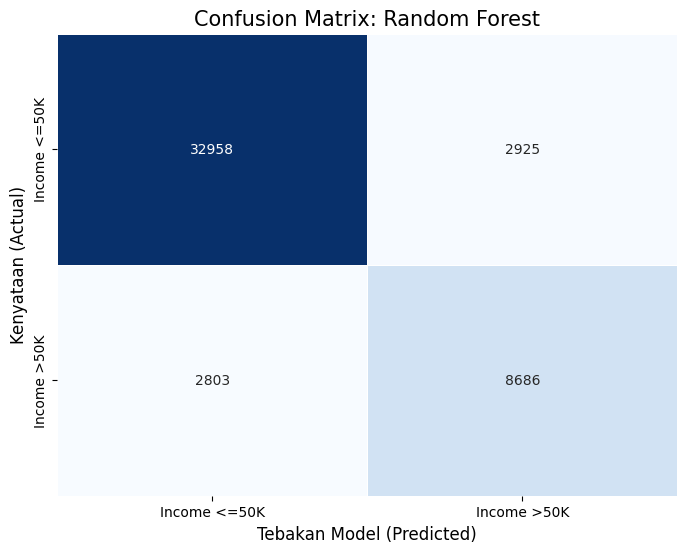

CARA BACA HEATMAP:
-> Kotak Kiri Atas & Kanan Bawah (Warna Gelap) = TEBAKAN BENAR.
-> Kotak Kanan Atas & Kiri Bawah (Warna Terang) = TEBAKAN SALAH (Error).

----------------------------------------

[Visualisasi 2: Faktor Penentu Pendapatan (Feature Importance)]


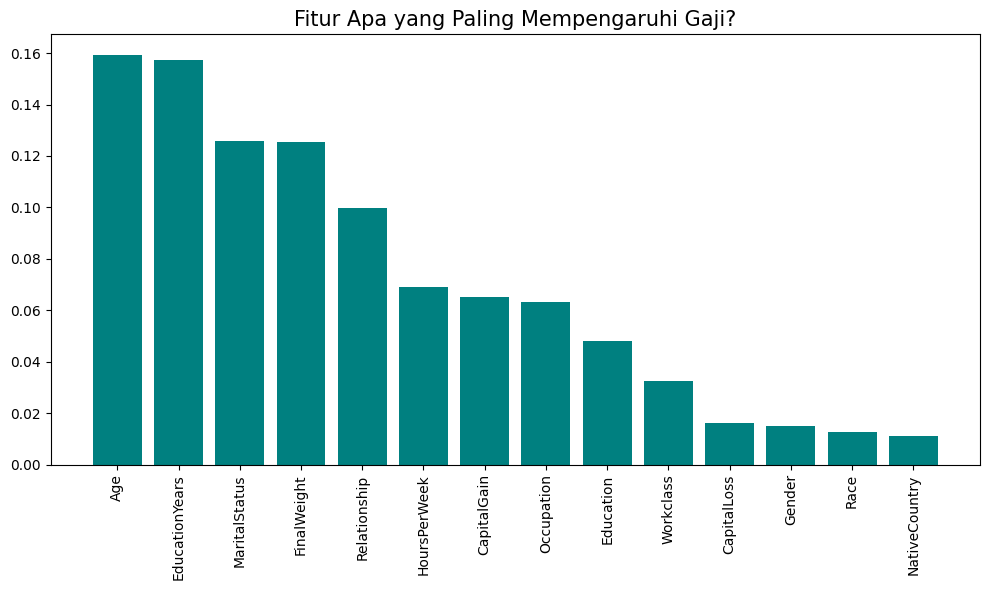

ANALISIS FAKTOR:
-> Lihat batang paling tinggi.
-> Jika 'Age', 'Education', atau 'Occupation' tinggi, berarti itu kunci sukses finansial menurut data.


In [ ]:
# ==========================================
# BAGIAN 6: Data Visualization (Explainability)
# ==========================================
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("=== 6. DATA VISUALIZATION ===\n")

# -------------------------------------------------------
# VISUALISASI 1: CONFUSION MATRIX (HEATMAP)
# Tujuannya: Melihat detail kesalahan prediksi model
# -------------------------------------------------------
print("[Visualisasi 1: Peta Kesalahan Prediksi (Confusion Matrix)]")

plt.figure(figsize=(8, 6))
# Kita ambil hasil prediksi Random Forest (karena biasanya dia pemenangnya)
cm = confusion_matrix(y_test, y_pred_rf)

# Membuat Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

plt.title('Confusion Matrix: Random Forest', fontsize=15)
plt.ylabel('Kenyataan (Actual)', fontsize=12)
plt.xlabel('Tebakan Model (Predicted)', fontsize=12)
plt.xticks([0.5, 1.5], ['Income <=50K', 'Income >50K'])
plt.yticks([0.5, 1.5], ['Income <=50K', 'Income >50K'])

plt.show()

print("CARA BACA HEATMAP:")
print("-> Kotak Kiri Atas & Kanan Bawah (Warna Gelap) = TEBAKAN BENAR.")
print("-> Kotak Kanan Atas & Kiri Bawah (Warna Terang) = TEBAKAN SALAH (Error).")


print("\n" + "-"*40 + "\n")


# -------------------------------------------------------
# VISUALISASI 2: FEATURE IMPORTANCE
# Tujuannya: Menjawab 'Faktor apa yang bikin orang gajinya besar?'
# -------------------------------------------------------
print("[Visualisasi 2: Faktor Penentu Pendapatan (Feature Importance)]")

# Ambil data feature importance dari Random Forest
importances = rf_model.feature_importances_
nama_fitur = X.columns

# Urutkan dari yang paling berpengaruh
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Fitur Apa yang Paling Mempengaruhi Gaji?", fontsize=15)
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), nama_fitur[indices], rotation=90)
plt.tight_layout()
plt.show()

print("ANALISIS FAKTOR:")
print("-> Lihat batang paling tinggi.")
print("-> Jika 'Age', 'Education', atau 'Occupation' tinggi, berarti itu kunci sukses finansial menurut data.")

In [ ]:
# ==========================================
# BAGIAN 7: Model Deployment & Testing (Simulasi)
# ==========================================
import joblib
import pandas as pd
import numpy as np

print("=== 7. MODEL DEPLOYMENT & TESTING ===\n")

# -------------------------------------------------------
# TAHAP A: PENYIMPANAN MODEL (SAVING)
# Kita simpan model Random Forest terbaik ke dalam file .pkl
# Agar bisa dipakai nanti tanpa harus training ulang.
# -------------------------------------------------------
nama_file_model = 'model_credit_scoring_rf.pkl'
joblib.dump(rf_model, nama_file_model)

print(f"[SYSTEM]: Model berhasil disimpan dengan nama file '{nama_file_model}'.")
print("          File ini siap didownload atau dipasang di sistem aplikasi.\n")


# -------------------------------------------------------
# TAHAP B: SIMULASI PENGGUNAAN (TESTING WITH NEW DATA)
# Anggaplah ada nasabah baru yang mengajukan kredit.
# Kita ambil contoh satu baris data dari X_test sebagai simulasi nasabah tersebut.
# -------------------------------------------------------
print("[SYSTEM]: Menerima data pengajuan nasabah baru...")

# 1. Load Model (Panggil model dari file yang disimpan tadi)
loaded_model = joblib.load(nama_file_model)

# 2. Ambil Data Dummy (Simulasi Nasabah)
# Kita ambil acak nasabah urutan ke-10 dari data testing
sample_nasabah = X_test.iloc[[10]]

# Tampilkan data mentah (yang sudah di-encode)
print(f"\nData Profil Nasabah (Encoded):\n{sample_nasabah.to_string(index=False)}")

# 3. Prediksi Keputusan
prediksi_angka = loaded_model.predict(sample_nasabah)
probabilitas = loaded_model.predict_proba(sample_nasabah)

# 4. Terjemahkan Hasil (Decoding)
# Ingat: 0 = <=50K (Risiko Tinggi), 1 = >50K (Layak/Risiko Rendah)
hasil_keputusan = ">50K (High Income)" if prediksi_angka[0] == 1 else "<=50K (Low Income)"
rekomendasi = "SETUJUI PENGAJUAN" if prediksi_angka[0] == 1 else "TOLAK / PERLU TINJAUAN MANUAL"

print("\n" + "="*40)
print("   HASIL KEPUTUSAN KREDIT SCORING")
print("="*40)
print(f"1. Prediksi Income  : {hasil_keputusan}")
print(f"2. Tingkat Keyakinan: {max(probabilitas[0])*100:.2f}%")
print(f"3. Rekomendasi Sistem: {rekomendasi}")

=== 7. MODEL DEPLOYMENT & TESTING ===

[SYSTEM]: Model berhasil disimpan dengan nama file 'model_credit_scoring_rf.pkl'.
          File ini siap didownload atau dipasang di sistem aplikasi.

[SYSTEM]: Menerima data pengajuan nasabah baru...

Data Profil Nasabah (Encoded):
 Age  Workclass  FinalWeight  Education  EducationYears  MaritalStatus  Occupation  Relationship  Race  Gender  CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry
47.0          4     158286.0         12            14.0              2           4             0     4       1          0.0          0.0          40.0             38

   HASIL KEPUTUSAN KREDIT SCORING
1. Prediksi Income  : >50K (High Income)
2. Tingkat Keyakinan: 100.00%
3. Rekomendasi Sistem: SETUJUI PENGAJUAN


In [ ]:
# ==========================================
# BAGIAN 7: Model Deployment & Interactive Testing
# ==========================================
import joblib
import pandas as pd
import numpy as np

print("=== 7. INTERACTIVE CREDIT SCORING APP ===\n")

# -------------------------------------------------------
# PERSIAPAN: MEMBUAT KAMUS (MAPPING)
# Agar kita tahu "Sales" itu kodenya nomor berapa di mata komputer
# -------------------------------------------------------
# Kita buat mapping dari data asli (df_clean) dan data angka (df_model)
map_job = dict(zip(df_clean['Occupation'], df_model['Occupation']))
# Urutkan biar rapi saat ditampilkan
map_job_sorted = dict(sorted(map_job.items(), key=lambda item: item[1]))

# -------------------------------------------------------
# FUNGSI APLIKASI INPUT MANUAL
# -------------------------------------------------------
def simulasi_kredit():
    print("\n" + "="*50)
    print("   FORMULIR PENGAJUAN KREDIT (SIMULASI)")
    print("="*50)

    # 1. INPUT UMUR
    try:
        input_usia = float(input("1. Masukkan Usia Nasabah (Tahun): "))
    except:
        input_usia = 30.0 # Default jika salah ketik

    # 2. INPUT JAM KERJA
    try:
        input_jam = float(input("2. Masukkan Jam Kerja per Minggu: "))
    except:
        input_jam = 40.0 # Default

    # 3. INPUT PEKERJAAN (Pilih Kode)
    print("\n[DAFTAR KODE PEKERJAAN]")
    # Tampilkan daftar pekerjaan dalam 3 kolom biar hemat tempat
    jobs = list(map_job_sorted.items())
    for i in range(0, len(jobs), 3):
        print("  ".join(f"{code}: {name:<18}" for name, code in jobs[i:i+3]))

    try:
        input_job_code = int(input("\n3. Masukkan KODE Pekerjaan (Angka): "))
    except:
        input_job_code = map_job['Other-service'] # Default

    # ---------------------------------------------------
    # MENYUSUN DATA INPUT
    # Karena model butuh banyak kolom (Education, dll), kita ambil profil
    # 'Rata-rata' (Median/Modus) untuk kolom yang tidak diinput user.
    # Lalu kita timpa (overwrite) dengan inputan user tadi.
    # ---------------------------------------------------
    # Ambil 1 baris contoh dari data test sebagai template
    data_baru = X_test.iloc[[0]].copy()

    # TIMPA dengan Inputan User
    data_baru['Age'] = input_usia
    data_baru['HoursPerWeek'] = input_jam
    data_baru['Occupation'] = input_job_code

    # PREDIKSI
    # Gunakan model Random Forest yang sudah dilatih (rf_model)
    prediksi = rf_model.predict(data_baru)
    probabilitas = rf_model.predict_proba(data_baru)
    peluang_kaya = probabilitas[0][1] * 100  # Peluang kelas 1

    # HASIL
    status = "LAYAK KREDIT (>50K)" if prediksi[0] == 1 else "BERISIKO (<=50K)"
    warna = "🟢 HIJAU" if prediksi[0] == 1 else "🔴 MERAH"

    print("\n" + "-"*50)
    print("   HASIL ANALISA SISTEM (AI)")
    print("-"*50)
    print(f"Profil: Usia {input_usia:.0f} tahun | Jam Kerja: {input_jam:.0f} jam | Job Code: {input_job_code}")
    print(f"Skor Keyakinan (Probabilitas High Income): {peluang_kaya:.2f}%")
    print(f"Keputusan Sistem: {warna} -> {status}")
    print("="*50)

# JALANKAN APLIKASI
simulasi_kredit()

=== 7. INTERACTIVE CREDIT SCORING APP ===


   FORMULIR PENGAJUAN KREDIT (SIMULASI)
1. Masukkan Usia Nasabah (Tahun): 24
2. Masukkan Jam Kerja per Minggu: 18

[DAFTAR KODE PEKERJAAN]
0: ?                   1: Adm-clerical        2: Armed-Forces      
3: Craft-repair        4: Exec-managerial     5: Farming-fishing   
6: Handlers-cleaners   7: Machine-op-inspct   8: Other-service     
9: Priv-house-serv     10: Prof-specialty      11: Protective-serv   
12: Sales               13: Tech-support        14: Transport-moving  

3. Masukkan KODE Pekerjaan (Angka): 4

--------------------------------------------------
   HASIL ANALISA SISTEM (AI)
--------------------------------------------------
Profil: Usia 24 tahun | Jam Kerja: 18 jam | Job Code: 4
Skor Keyakinan (Probabilitas High Income): 7.00%
Keputusan Sistem: 🔴 MERAH -> BERISIKO (<=50K)


In [ ]:
# ==========================================
# BAGIAN 8: Optimasi Model (Hyperparameter Tuning)
# ==========================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("=== 8. OPTIMASI MODEL: 6 SKENARIO EKSPERIMEN ===\n")
print("Parameter yang dioptimasi:")
print("1. n_estimators (Jumlah Pohon)")
print("2. max_depth (Kedalaman Maksimal)")
print("3. min_samples_split (Minimal Sampel Split)\n")

# -------------------------------------------------------
# SKENARIO 1: MODEL RINGAN (Light)
# Param: Pohon Sedikit, Dangkal, Split Standar
# -------------------------------------------------------
print("-" * 40)
print("SKENARIO 1: n=50, depth=5, split=2")
print("-" * 40)

model_1 = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=2, random_state=42)
model_1.fit(X_train_smote, y_train_smote)
acc_1 = accuracy_score(y_test, model_1.predict(X_test))
print(f"-> Akurasi Skenario 1: {acc_1*100:.2f}%")


# -------------------------------------------------------
# SKENARIO 2: MODEL MENENGAH A (Medium-Depth)
# Param: Pohon Standar, Kedalaman Sedang
# -------------------------------------------------------
print("\n" + "-" * 40)
print("SKENARIO 2: n=100, depth=10, split=2")
print("-" * 40)

model_2 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
model_2.fit(X_train_smote, y_train_smote)
acc_2 = accuracy_score(y_test, model_2.predict(X_test))
print(f"-> Akurasi Skenario 2: {acc_2*100:.2f}%")


# -------------------------------------------------------
# SKENARIO 3: MODEL MENENGAH B (High-Split)
# Param: Pohon Standar, Kedalaman Sedang, Split Besar (Lebih Konservatif)
# -------------------------------------------------------
print("\n" + "-" * 40)
print("SKENARIO 3: n=100, depth=10, split=10")
print("-" * 40)

model_3 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
model_3.fit(X_train_smote, y_train_smote)
acc_3 = accuracy_score(y_test, model_3.predict(X_test))
print(f"-> Akurasi Skenario 3: {acc_3*100:.2f}%")


# -------------------------------------------------------
# SKENARIO 4: MODEL BERAT A (Deep Learner)
# Param: Pohon Banyak, Sangat Dalam
# -------------------------------------------------------
print("\n" + "-" * 40)
print("SKENARIO 4: n=200, depth=20, split=2")
print("-" * 40)

model_4 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)
model_4.fit(X_train_smote, y_train_smote)
acc_4 = accuracy_score(y_test, model_4.predict(X_test))
print(f"-> Akurasi Skenario 4: {acc_4*100:.2f}%")


# -------------------------------------------------------
# SKENARIO 5: MODEL BERAT B (Very Deep & Robust)
# Param: Pohon Banyak, Sangat Dalam, Split Besar
# -------------------------------------------------------
print("\n" + "-" * 40)
print("SKENARIO 5: n=200, depth=20, split=10")
print("-" * 40)

model_5 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=10, random_state=42)
model_5.fit(X_train_smote, y_train_smote)
acc_5 = accuracy_score(y_test, model_5.predict(X_test))
print(f"-> Akurasi Skenario 5: {acc_5*100:.2f}%")


# -------------------------------------------------------
# SKENARIO 6: MODEL AGRESIF (Full Power)
# Param: Pohon Sangat Banyak, Tanpa Batas Kedalaman (None)
# -------------------------------------------------------
print("\n" + "-" * 40)
print("SKENARIO 6: n=300, depth=None, split=2")
print("-" * 40)

model_6 = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, random_state=42)
model_6.fit(X_train_smote, y_train_smote)
acc_6 = accuracy_score(y_test, model_6.predict(X_test))
print(f"-> Akurasi Skenario 6: {acc_6*100:.2f}%")


# -------------------------------------------------------
# KESIMPULAN AKHIR
# -------------------------------------------------------
print("\n" + "="*40)
print("   REKAPITULASI HASIL OPTIMASI")
print("="*40)
print(f"1. Skenario 1: {acc_1*100:.2f}%")
print(f"2. Skenario 2: {acc_2*100:.2f}%")
print(f"3. Skenario 3: {acc_3*100:.2f}%")
print(f"4. Skenario 4: {acc_4*100:.2f}%")
print(f"5. Skenario 5: {acc_5*100:.2f}%")
print(f"6. Skenario 6: {acc_6*100:.2f}%")

# Cari nilai max secara manual untuk print
all_acc = [acc_1, acc_2, acc_3, acc_4, acc_5, acc_6]
best_score = max(all_acc)
best_scenario = all_acc.index(best_score) + 1

print(f"\n[REKOMENDASI]: Skenario Terbaik adalah Skenario {best_scenario}")
print(f"dengan Akurasi {best_score*100:.2f}%.")

=== 8. OPTIMASI MODEL: 6 SKENARIO EKSPERIMEN ===

Parameter yang dioptimasi:
1. n_estimators (Jumlah Pohon)
2. max_depth (Kedalaman Maksimal)
3. min_samples_split (Minimal Sampel Split)

----------------------------------------
SKENARIO 1: n=50, depth=5, split=2
----------------------------------------
-> Akurasi Skenario 1: 75.70%

----------------------------------------
SKENARIO 2: n=100, depth=10, split=2
----------------------------------------
-> Akurasi Skenario 2: 80.29%

----------------------------------------
SKENARIO 3: n=100, depth=10, split=10
----------------------------------------
-> Akurasi Skenario 3: 79.92%

----------------------------------------
SKENARIO 4: n=200, depth=20, split=2
----------------------------------------
-> Akurasi Skenario 4: 84.53%

----------------------------------------
SKENARIO 5: n=200, depth=20, split=10
----------------------------------------
-> Akurasi Skenario 5: 84.08%

----------------------------------------
SKENARIO 6: n=300, dep